## Visualization of a 2d Gaussian density as a surface and contour plots 

Import Libraries

In [1]:
try:
    import jax 
except:
    %pip install jax jaxlib
    import jax
import jax.numpy as jnp

try:
    %matplotlib inline
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    %matplotlib inline
    import matplotlib.pyplot as plt

try:
    import os
except:
    %pip install os
    import os

try:
    import jax.scipy
except:
    %pip install jax.scipy
    import jax.scipy

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

from mpl_toolkits.mplot3d import axes3d
from jax.scipy.stats import multivariate_normal

Import LATEXIFY for better figures

In [2]:
import os
LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:
    import sys

    sys.path.append("scripts")  # Don't change to "../scripts", instead, run this nb from repo's root with ipython
    from plot_utils import latexify, savefig

    latexify(width_scale_factor=3, fig_height=1.5)

Defining gasussian, multivaraite distributions and plotting contours and surface plots

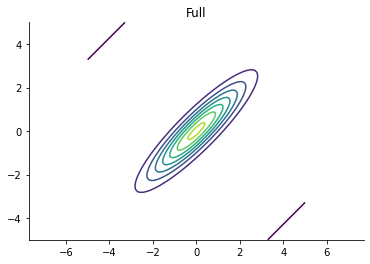

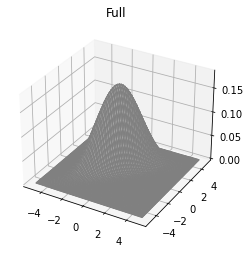

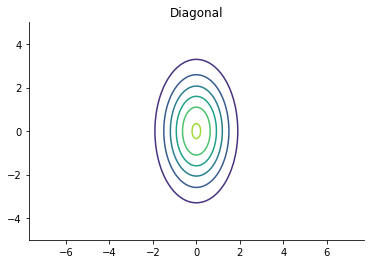

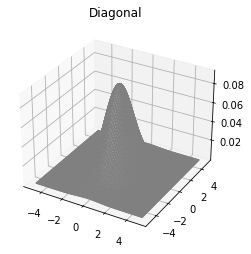

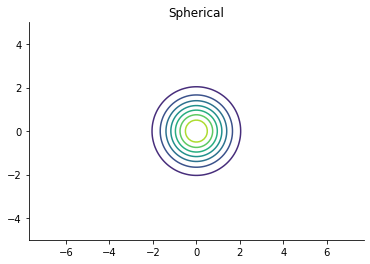

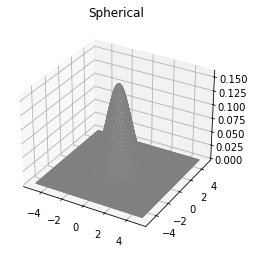

In [3]:
gaussians = ["Full", "Diagonal", "Spherical"]

mean = jnp.array([0, 0])

covariance = {"Full": jnp.array([[2, 1.8], [1.8, 2]]),
        "Diagonal": jnp.array([[1, 0], [0, 3]]),
        "Spherical": jnp.array([[1, 0], [0, 1]])}


#Multivariate gaussian PDF
class gaussian_pdf(object):
    def multi_normal(self, x, y, G):
        return multivariate_normal.pdf(jnp.array([x, y]), mean=mean, cov=covariance[G])

def make_contour_plot(gauss, fig=None, ax=None):
    Z =gauss_pdf(X, Y, gauss)
    if fig is None:
        fig, ax = plt.subplots()
    ax.contour(X, Y, Z)
    plt.axis('equal')
    sns.despine()
    plt.title(gauss)
    plt.draw()
    if LATEXIFY:
        savefig('gaussPlot2dDemoContour{}_latexified.pdf'.format(gauss))
    plt.show()


def make_surface_plot(gauss,fig=None, ax=None):
    Z = gauss_pdf(X, Y, gauss)
    if fig is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='white', edgecolor="grey")
    ax.set_aspect('auto')
    sns.despine()
    plt.title(gauss)
    plt.draw()
    if LATEXIFY:
        savefig('gaussPlot2dDemoSurf{}_latexified.pdf'.format(gauss))
    plt.show()

multivariate_pdfs = gaussian_pdf()
gauss_pdf = jnp.vectorize(multivariate_pdfs.multi_normal, excluded=[2])

n = 5
h = 100
points = jnp.linspace(-n, n, h)
X, Y = jnp.meshgrid(points, points)
    
for gauss in gaussians:
    make_contour_plot(gauss, fig=None, ax=None)
    make_surface_plot(gauss, fig=None, ax=None)

Will implement @interact later, caught with some course submissions and other projects.